In [1]:
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable, LpMinimize

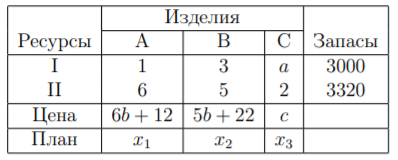


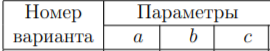


### Прямая задача линейного программирования
Суть задачи состоит в нахождении оптимального плана производства ресурсов с целью максимизации прибыли. Таким образом, целевая функция представляет собою сумму стоимостей всех произведенных товаров. Стоимость это произведение цены изделия на количество изделий одного типа.

#### Решаем задачу максимизации

In [2]:
model = LpProblem(name="resource-allocation", sense=LpMaximize)
model

resource-allocation:
MAXIMIZE
None
VARIABLES

#### Определяем переменные решения

In [3]:
x1 = LpVariable(name="x1",  lowBound=0)
x2 = LpVariable(name="x2",  lowBound=0)
x3 = LpVariable(name="x3",  lowBound=0)

#### Определяем запасы ресурсов, расходы ресурсов на изделия, а также цены изделий.

In [4]:
zapas_1 = 3000 # Запасы ресурса первого типа
zapas_2 = 3320 # Запасы ресурса второго типа

# Параметры
a = 2 
b = 3
c = 21

rashod_A_1 = 1 # расход ресурса первого типа на изделие А
rashod_A_2 = 6 # расход ресурса второго типа на изделие А

rashod_B_1 = 3 # расход ресурса первого типа на изделие B
rashod_B_2 = 5 # расход ресурса второго типа на изделие B

rashod_C_1 = a # расход ресурса первого типа на изделие C
rashod_C_2 = 2 # расход ресурса второго типа на изделие C

price_A = 6 * b + 12 # цена изделия A
price_B = 5 * b + 22 # цена изделия B
price_C = c #цена изделия C

#### Задаем ограничения для модели

In [5]:
constraint_1 = rashod_A_1 * x1 + rashod_B_1 * x2 + rashod_C_1 * x3 <= zapas_1
constraint_2 = rashod_A_2 * x1 + rashod_B_2 * x2 + rashod_C_2 * x3 <= zapas_2

#Опишем и добавим целевую функцию
obj_fun = price_A * x1 + price_B * x2 + price_C * x3

model += (constraint_1, "1")
model += (constraint_2, "2")
model += (obj_fun)
model

resource-allocation:
MAXIMIZE
30*x1 + 37*x2 + 21*x3 + 0
SUBJECT TO
1: x1 + 3 x2 + 2 x3 <= 3000

2: 6 x1 + 5 x2 + 2 x3 <= 3320

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous

#### Решаем задачу максимизации

In [6]:
status = model.solve()

In [7]:
print(f"Статус решения: {model.status}, {LpStatus[model.status]}")
F = model.objective.value()
print(f"Оптимальное значение целевой функции: {int(F)}")

x1_total = model.variables()[0].value()
x2_total = model.variables()[1].value()
x3_total = model.variables()[2].value()

print(f"Оптимальный план: (x1 = {int(x1_total)}, x2 = {int(x2_total)}, x3 = {int(x3_total)})")

for name, c in list(model.constraints.items()):
    print(f"{name} : {c}\tFor dual task: {c.pi}")

Статус решения: 1, Optimal
Оптимальное значение целевой функции: 32748
Оптимальный план: (x1 = 64, x2 = 0, x3 = 1468)
1 : x1 + 3*x2 + 2*x3 <= 3000	For dual task: 6.6
2 : 6*x1 + 5*x2 + 2*x3 <= 3320	For dual task: 3.9


#### Реальный расход ресурсов

In [8]:
res_1 = x1_total * rashod_A_1 + x2_total * rashod_B_1 + x3_total * rashod_C_1
res_2 = x1_total * rashod_A_2 + x2_total * rashod_B_2 + x3_total * rashod_C_2

print(f"Реальный расход ресурса 1 = {int(res_1)}")
print(f"Реальный расход ресурса 2 = {int(res_2)}")

Реальный расход ресурса 1 = 3000
Реальный расход ресурса 2 = 3320


#### Найдем дефицит ресурсов

In [9]:
deficit_1 = abs(res_1 - zapas_1)
deficit_2 = abs(res_2 - zapas_2)

print(f"Дефицит ресурса 1 = {int(deficit_1)}")
print(f"Дефицит ресурса 2 = {int(deficit_2)}")

Дефицит ресурса 1 = 0
Дефицит ресурса 2 = 0


##### Как видно, дефицит ресурсов отсутствует.

### Вывод
Таким образом, наш оптимальный план представляет собою проивзодство 64 изделий А, 0 изделий B и 1468 изделий C. При этом прибыль составит 32748 единиц.

### Двойственная задача линейного программирования
Прямая задача в нашем случае - поиск оптимального плана производства с целью максимизации прибыли. Двойственная задача имеет иной смысл. Необходимо минимизировать стоимость ресурсов, предназначенных для производства изделий. Результатом решения двойственной задачи будет оптимальное значение целевой функции и стоимости каждого ресурса.

Двойственная задача строится таким образом: 
* переменные, используемые в прямой задаче, становятся ограничениями;
* ограничения из прямой задачи становятся переменными;
* изменяется цель - если прямая задача была задачей максимизации, то обратная - задача минимизации и наоборот.

#### Решаем задачу минимизации

In [10]:
model_dual = LpProblem(name="resource-allocation", sense=LpMinimize) 
model_dual

resource-allocation:
MINIMIZE
None
VARIABLES

#### Определяем переменные решения

In [11]:
y1 = LpVariable(name="y1",  lowBound=0)
y2 = LpVariable(name="y2",  lowBound=0)

#### Задаем ограничения для модели

In [12]:
constraint_1_dual = rashod_A_1 * y1 + rashod_A_2 * y2 >= price_A
constraint_2_dual = rashod_B_1 * y1 + rashod_B_2 * y2 >= price_B
constraint_3_dual = rashod_C_1 * y1 + rashod_C_2 * y2 >= price_C

#Опишем и добавим целевую функцию 
obj_fun_dual = zapas_1 * y1 + zapas_2 * y2

model_dual += (constraint_1_dual, "1")
model_dual += (constraint_2_dual, "2")
model_dual += (constraint_3_dual, "3")

model_dual += (obj_fun_dual)
model_dual

resource-allocation:
MINIMIZE
3000*y1 + 3320*y2 + 0
SUBJECT TO
1: y1 + 6 y2 >= 30

2: 3 y1 + 5 y2 >= 37

3: 2 y1 + 2 y2 >= 21

VARIABLES
y1 Continuous
y2 Continuous

#### Решаем задачу минимизации

In [13]:
model_dual.solve()

1

In [14]:
print(f"Статус решения: {model_dual.status}, {LpStatus[model_dual.status]}")
F = model_dual.objective.value()
print(f"Оптимальное значение целевой функции: {int(F)}")

y1_total = model_dual.variables()[0].value()
y2_total = model_dual.variables()[1].value()

print(f"Оптимальный план: (y1 = {y1_total}, y2 = {y2_total})")

Статус решения: 1, Optimal
Оптимальное значение целевой функции: 32748
Оптимальный план: (y1 = 6.6, y2 = 3.9)


## Вывод
В результате решения двойственной задачи было установлено, что оптимальная цена первого ресурса составляет 6.6 единиц, второго ресурса - 3.9 единиц. Итоговая прибыль составит 32748 единиц.